In [1]:
# import all the library
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # library for plotting
# line required for inline charts/plots
%matplotlib inline

from collections import defaultdict
# library for evaluation metrics
# from sklearn import metrics
# # library for sampling the data sets
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_excel('C:\\Users\\meisanmo\\Downloads\\Netflix.xlsx', index_col=0)  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 1 to 101
Data columns (total 64 columns):
 #   Column                                                                                                  Non-Null Count  Dtype         
---  ------                                                                                                  --------------  -----         
 0   Start time                                                                                              101 non-null    datetime64[ns]
 1   Completion time                                                                                         101 non-null    datetime64[ns]
 2   Email                                                                                                   101 non-null    object        
 3   Name                                                                                                    0 non-null      float64       
 4   Total points                                      

## Data Cleaning

In [4]:
# Copy df to df1
df1 = df

# Remove unused columns
df1 = df1[df1.columns.drop(list(df1.filter(regex='Points')))]
df1 = df1[df1.columns.drop(list(df1.filter(regex='Feedback')))]
df1 = df1.drop(['Start time', 'Completion time', 'Email', 'Name', 'Total points', 'Quiz feedback'], axis=1)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 1 to 101
Data columns (total 20 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Which country you are from?                                                                  101 non-null    object 
 1   What is your gender?                                                                         101 non-null    object 
 2   How old are you?                                                                             101 non-null    object 
 3   What is your employment status?                                                              101 non-null    object 
 4   What is your approximate annual household income?                                            101 non-null    object 
 5   How many members are there in your h

In [6]:
# Rename columns
df1.rename(columns={'Which country you are from?': 'country', 
                   'What is your gender?': 'gender',
                   'How old are you?': 'age',
                   'What is your employment status?': 'employment',
                   'What is your approximate annual household income?': 'income',
                   'How many members are there in your household?': 'household_member',
                   'Where do you prefer to view your Digital content like Movies, TV Series, Documentaries etc?': 'platform',
                   'Are you aware about the Online Streaming provider company called Netflix?': 'netflix',
                   'Do Netflix available in your country? If available, do you subscribe it?': 'availability',
                   'How many hours of TV shows/movies do you access per week on Netflix?': 'duration',
                   'Rank there devices according to how often you access Netflix from them.': 'rank_device',
                   'Which type of genre you prefer?': 'genre',
                   'Which subscription plan you use?': 'plan',
                   'How do you come to hear about promotions for Netflix? Check all that apply.': 'promotion',
                   'Do you think the Netflix monthly subscription plan is reasonable?': 'monthly_subscription',
                   'Have you experience Netflix first month free trial?': 'free',
                   'How do you know about Netflix?': 'news',
                   'Why you choose Netflix compare to others?': 'reason',
                   'Will you continue subscription Netflix?': 'continue',
                   'How would you rate the experience on Netflix?': 'rating'}, inplace=True)

In [7]:
# df1 = df1.drop(['platform','duration'], axis=1)

In [8]:
# Standard the country name
display(df1['country'].unique())

array(['Malaysia', 'malaysia', 'Malaysia ', 'MALAYSIA', 'AUSTRALIA',
       'Korea', 'uk', 'Singapore', 'USA', 'Russia ', 'Malaydia', 'China',
       'Australia', 'china', 'PRC', 'Sudan'], dtype=object)

In [9]:
df1['country'] = df1['country'].replace(['malaysia', 'Malaysia ','Malaydia', 'MALAYSIA'], 'Malaysia')
df1['country'] = df1['country'].replace(['AUSTRALIA'], 'Australia')
df1['country'] = df1['country'].replace(['china', 'PRC'], 'China')
df1['country'] = df1['country'].replace(['uk'], 'United Kingdom')
df1['country'] = df1['country'].replace(['Russia '], 'Russia')

In [10]:
display(df1['income'].unique())

array(['RM50,000 - RM100,000(RMB 75500 – RMB 150000)',
       'RM100,000 - RM150,000 (RMB 150000 – RMB 226000)',
       'More than RM150,000 (RMB 226000)',
       'Less than RM25,000 (RMB 38000)',
       'RM25,000 - RM50,000 (RMB 38000 - RMB 75500)'], dtype=object)

In [11]:
# Categorize the income
df1['income'] = df1['income'].replace(['Less than RM25,000 (RMB 38000)'], 1)
df1['income'] = df1['income'].replace(['RM25,000 - RM50,000 (RMB 38000 - RMB 75500)'], 2)
df1['income'] = df1['income'].replace(['RM50,000 - RM100,000(RMB 75500 – RMB 150000)'], 3)
df1['income'] = df1['income'].replace(['RM100,000 - RM150,000 (RMB 150000 – RMB 226000)'], 4)
df1['income'] = df1['income'].replace(['More than RM150,000 (RMB 226000)'], 5)

In [12]:
display(df1['income'].unique())

array([3, 4, 5, 1, 2], dtype=int64)

In [13]:
# Encode those multiple fields
df1 = df1.drop('genre',axis=1).join(df1.genre.str.get_dummies(';').add_prefix('genre_'))
df1 = df1.drop('news',axis=1).join(df1.news.str.get_dummies(';').add_prefix('news_'))
df1 = df1.drop('promotion',axis=1).join(df1.promotion.str.get_dummies(';').add_prefix('promotion_'))
df1 = df1.drop('reason',axis=1).join(df1.reason.str.get_dummies(';').add_prefix('reason_'))

In [14]:
# Output to csv
df1.to_csv('C:\\Users\\meisanmo\\Downloads\\Netflix1.csv')

## Data Exploratory

In [15]:
df_csv = pd.read_csv('C:\\Users\\meisanmo\\Downloads\\Netflix1.csv')  

### Place

[Text(0, 0.5, 'Respondents count'), Text(0.5, 0, 'Country with availability')]

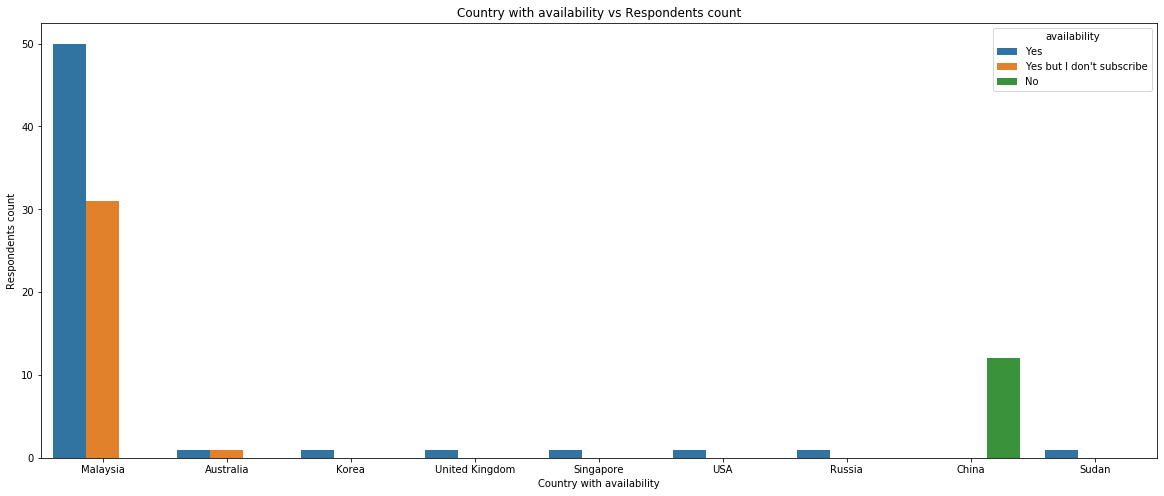

In [16]:
# Question 1, 9 
plt.figure(figsize=(20,8))
ax = sns.countplot(x='country', data=df_csv, hue='availability')
ax.set_title('Country with availability vs Respondents count')
ax.set(xlabel='Country with availability', ylabel='Respondents count')

Text(0, 0.5, 'Device Ranking')

<Figure size 1440x576 with 0 Axes>

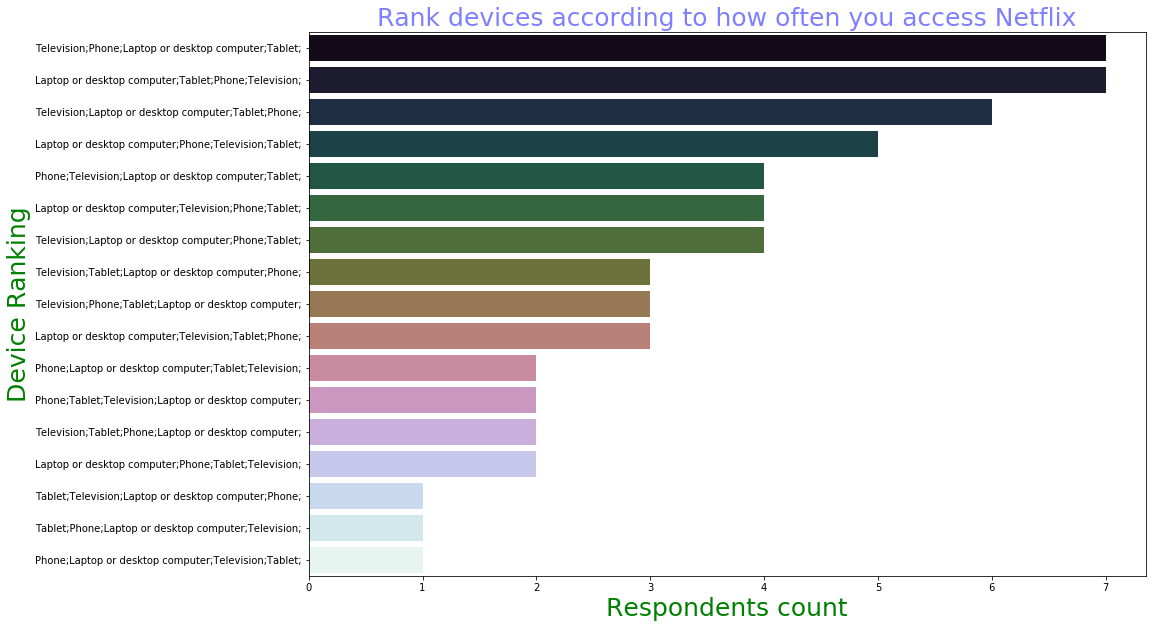

In [17]:
# Question 11 : Rank device
plt.figure(figsize=(20,8))
# sns.countplot(x='gender', data=df_csv, hue='rank_device')

rank_device_title = df_csv.rank_device.value_counts()

plt.subplots(figsize=(15,10))
ax = sns.barplot(x=rank_device_title , y=rank_device_title .index, palette='cubehelix')
ax.set_title('Rank devices according to how often you access Netflix', color='blue', alpha=0.5, size=25)
ax.set_xlabel('Respondents count', color='green', size=25)
ax.set_ylabel('Device Ranking', color='green', size=25)

### Price

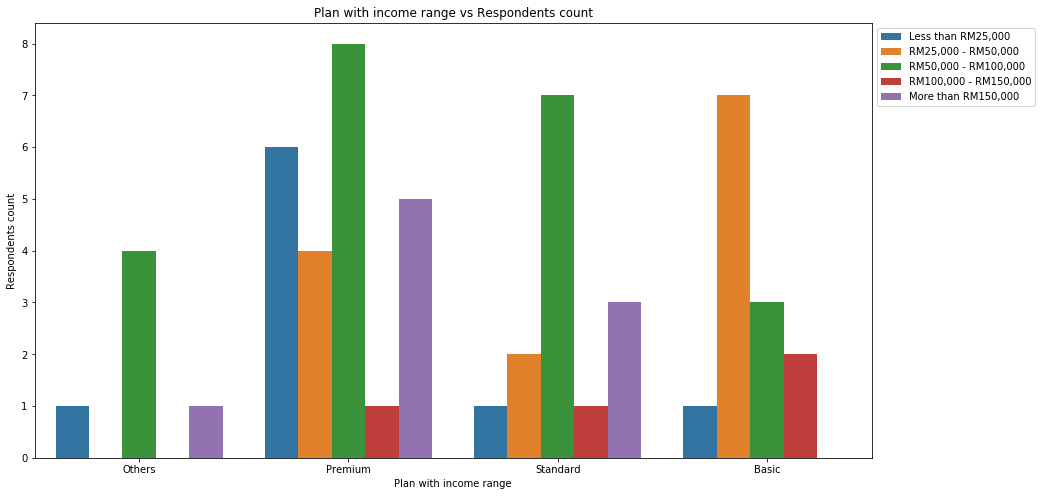

In [18]:
# 1 Less than RM25,000
# 2 RM25,000 - RM50,000
# 3 RM50,000 - RM100,000
# 4 RM100,000 - RM150,000
# 5 More than RM150,000
# Question 13 
plt.figure(figsize=(15,8))
ax = sns.countplot(x='plan', data=df_csv, hue='income')
ax.set_title('Plan with income range vs Respondents count')
legend_labels, _= ax.get_legend_handles_labels()
ax.set(xlabel='Plan with income range', ylabel='Respondents count')
ax.legend(legend_labels, ['Less than RM25,000','RM25,000 - RM50,000','RM50,000 - RM100,000','RM100,000 - RM150,000','More than RM150,000'], bbox_to_anchor=(1,1))
plt.show();

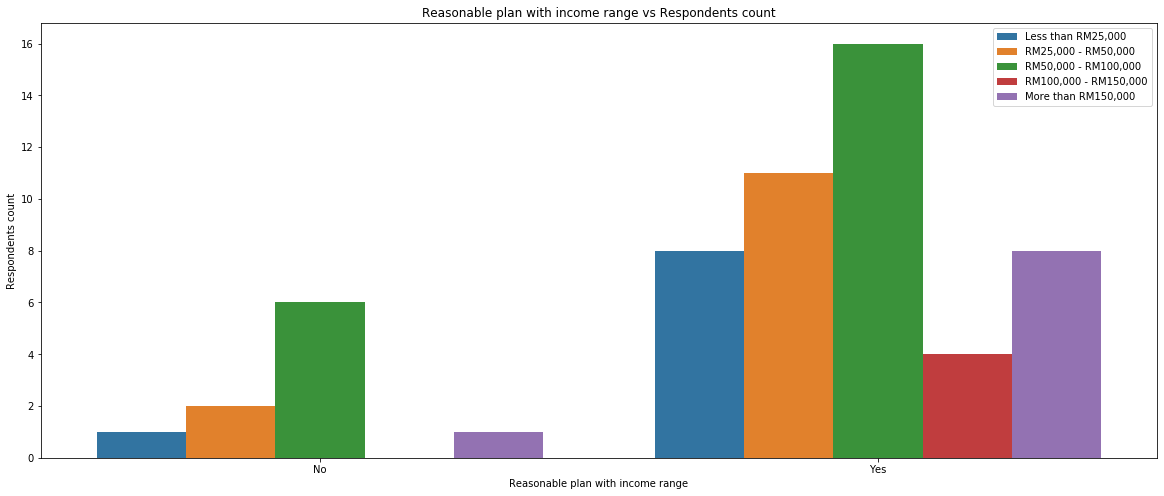

In [19]:
# Question 15 : Monthly subscription reasonable
plt.figure(figsize=(20,8))
ax = sns.countplot(x='monthly_subscription', data=df_csv, hue='income')
ax.set_title('Reasonable plan with income range vs Respondents count')
legend_labels, _= ax.get_legend_handles_labels()
ax.set(xlabel='Reasonable plan with income range', ylabel='Respondents count')
ax.legend(legend_labels, ['Less than RM25,000','RM25,000 - RM50,000','RM50,000 - RM100,000','RM100,000 - RM150,000','More than RM150,000'], bbox_to_anchor=(1,1))
plt.show();

### Promotion

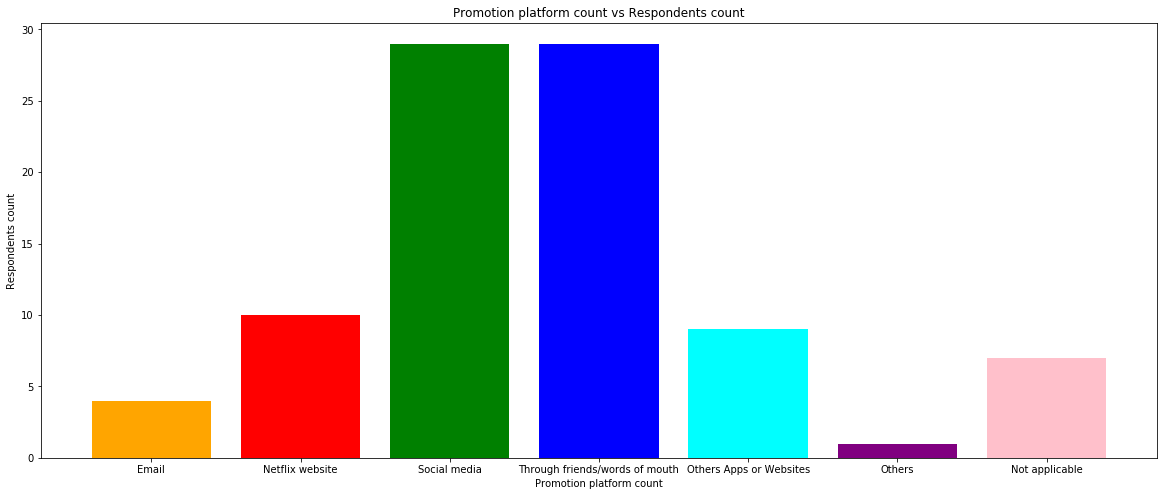

In [20]:
# Question 14
fig = plt.figure(figsize=(20,8))
a = df1['promotion_Email'].sum()
b = df1['promotion_Netflix website'].sum()
c = df1['promotion_Social media'].sum()
d = df1['promotion_Through friends/words of mouth'].sum()
e = df1['promotion_Others Apps or Websites'].sum()
f = df1['promotion_Others'].sum()
g = df1['promotion_Not applicable'].sum()

# y = np.array([a, b, c, d, e, f, g])
# mylabels = ["Email", "Netflix website", "Social media", "Through friends/words of mouth", "Others Apps or Websites", "Others", "Not applicable"]

# plt.pie(y, labels = mylabels, startangle = 90)
# plt.show() 
ax = fig.subplots()
x = np.array(["Email", "Netflix website", "Social media", "Through friends/words of mouth", "Others Apps or Websites", "Others", "Not applicable"])
y = np.array([a, b, c, d, e, f, g])
ax.set_ylabel('Respondents count')
ax.set_xlabel('Promotion platform count')
ax.set_title('Promotion platform count vs Respondents count')
plt.bar(x, y,  color=['orange', 'red', 'green', 'blue', 'cyan', 'purple', 'pink'])
plt.show()

Text(0.5, 1.0, 'Free Trial vs Respondents count')

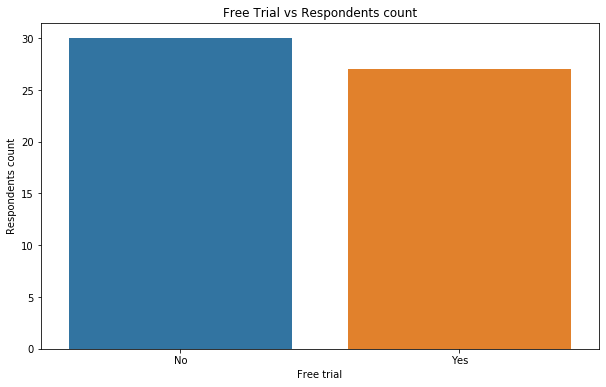

In [21]:
# Question 16
plt.figure(figsize=(10,6))
ax = sns.countplot(x='free', data=df_csv)
ax.set_ylabel('Respondents count')
ax.set_xlabel('Free trial')
ax.set_title('Free Trial vs Respondents count')

### Product

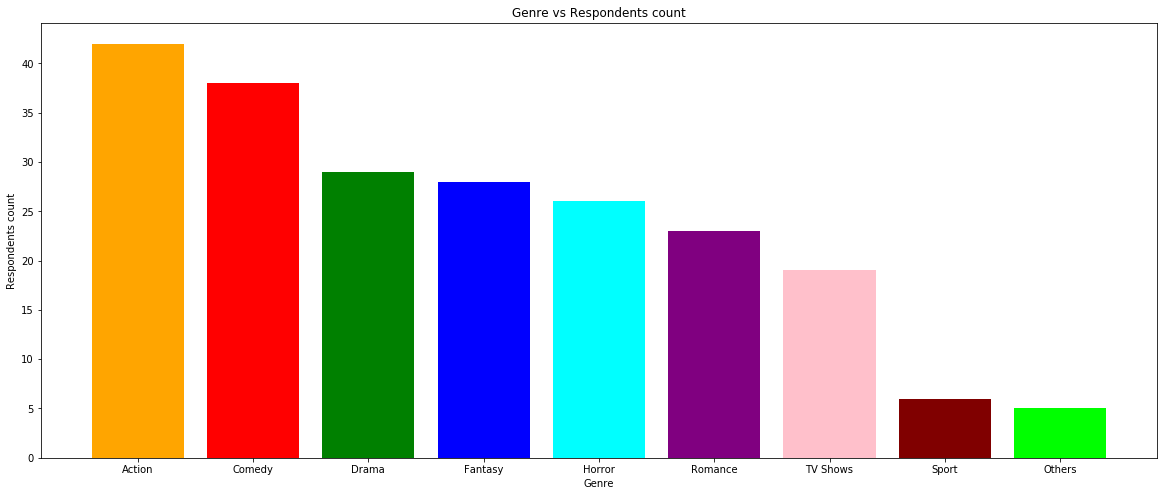

In [22]:
# Question 8: Are you aware about the Online Streaming provider company called Netflix? - ignore
# 10 : How many hours of TV shows/movies do you access per week on Netflix? - ignore
# 12 : Which type of genre you prefer?
# 17 : How do you know about Netflix?
# 18 : Why you choose Netflix compare to others?
# 19 : Will you continue subscription Netflix?

# Question 12 : Which type of genre you prefer?
fig = plt.figure(figsize=(20,8))
a = df1['genre_Action'].sum()
b = df1['genre_Comedy'].sum()
c = df1['genre_Drama'].sum()
d = df1['genre_Fantasy'].sum()
e = df1['genre_Horror'].sum()
f = df1['genre_Romance'].sum()
g = df1['genre_TV Shows'].sum()
h = df1['genre_Sport'].sum()
i = df1['genre_Others'].sum()

ax = fig.subplots()
x = np.array(["Action", "Comedy", "Drama", "Fantasy", "Horror", "Romance", "TV Shows", "Sport", "Others"])
y = np.array([a, b, c, d, e, f, g, h, i])
ax.set_ylabel('Respondents count')
ax.set_xlabel('Genre')
ax.set_title('Genre vs Respondents count')

plt.bar(x, y,  color=['orange', 'red', 'green', 'blue', 'cyan', 'purple', 'pink', 'maroon', 'lime'])
plt.show()

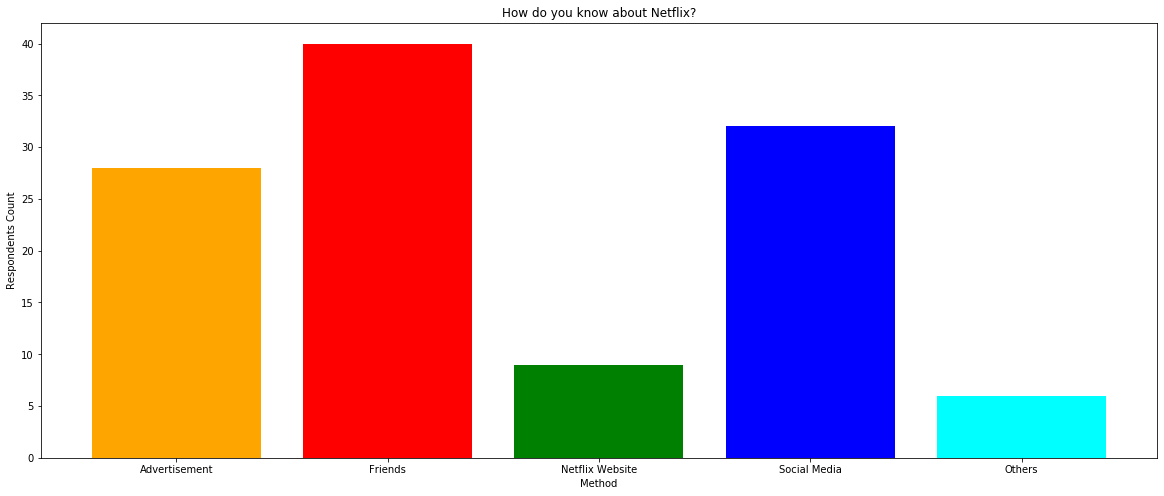

In [23]:
# 17 : How do you know about Netflix?
fig = plt.figure(figsize=(20,8))
a = df1['news_Advertisement'].sum()
b = df1['news_Friends'].sum()
c = df1['news_Netflix Website'].sum()
d = df1['news_Social Media'].sum()
e = df1['news_Others'].sum()

ax = fig.subplots()
x = np.array(["Advertisement", "Friends", "Netflix Website", "Social Media", "Others"])
y = np.array([a, b, c, d, e])
ax.set_ylabel('Respondents Count')
ax.set_xlabel('Method')
ax.set_title('How do you know about Netflix?')

plt.bar(x, y,  color=['orange', 'red', 'green', 'blue', 'cyan'])
plt.show()

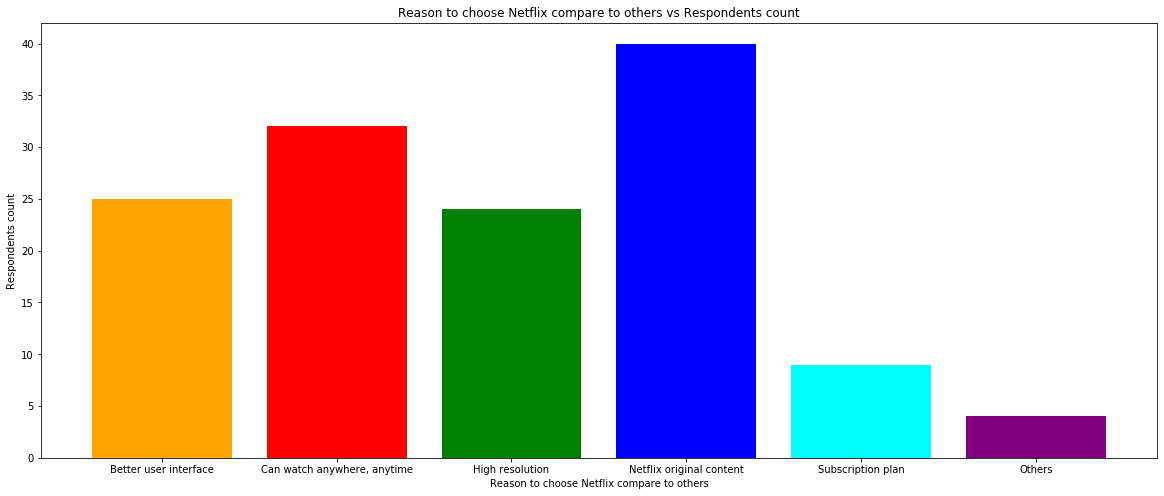

In [24]:
# 18 : Why you choose Netflix compare to others?
fig = plt.figure(figsize=(20,8))
a = df1['reason_Better user interface'].sum()
b = df1['reason_Can watch anywhere, anytime'].sum()
c = df1['reason_High resolution'].sum()
d = df1['reason_Netflix original content'].sum()
e = df1['reason_Subscription plan'].sum()
f = df1['reason_Others'].sum()

ax = fig.subplots()
x = np.array(["Better user interface", "Can watch anywhere, anytime", "High resolution", "Netflix original content", "Subscription plan", "Others"])
y = np.array([a, b, c, d, e, f])
ax.set_ylabel('Respondents count')
ax.set_xlabel('Reason to choose Netflix compare to others')
ax.set_title('Reason to choose Netflix compare to others vs Respondents count')
plt.bar(x, y, color=['orange', 'red', 'green', 'blue', 'cyan', 'purple'])
plt.show()

Text(0.5, 1.0, 'Access Netflix per week with continue subscription Netflix vs Respondents count')

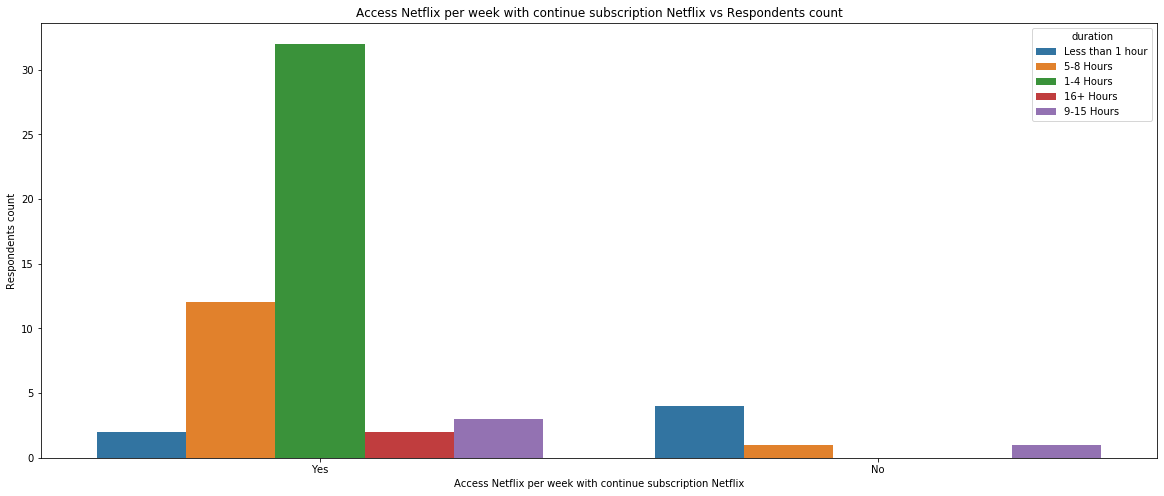

In [25]:
# # Question 8: Are you aware about the Online Streaming provider company called Netflix? - ignore
# 10 : How many hours of TV shows/movies do you access per week on Netflix? 
# 19 : Will you continue subscription Netflix?
plt.figure(figsize=(20,8))
ax = sns.countplot(x='continue', data=df_csv, hue='duration')

ax.set_ylabel('Respondents count')
ax.set_xlabel('Access Netflix per week with continue subscription Netflix')
ax.set_title('Access Netflix per week with continue subscription Netflix vs Respondents count')

Text(0.5, 1.0, 'Rating with continue subscription Netflix vs Respondents count')

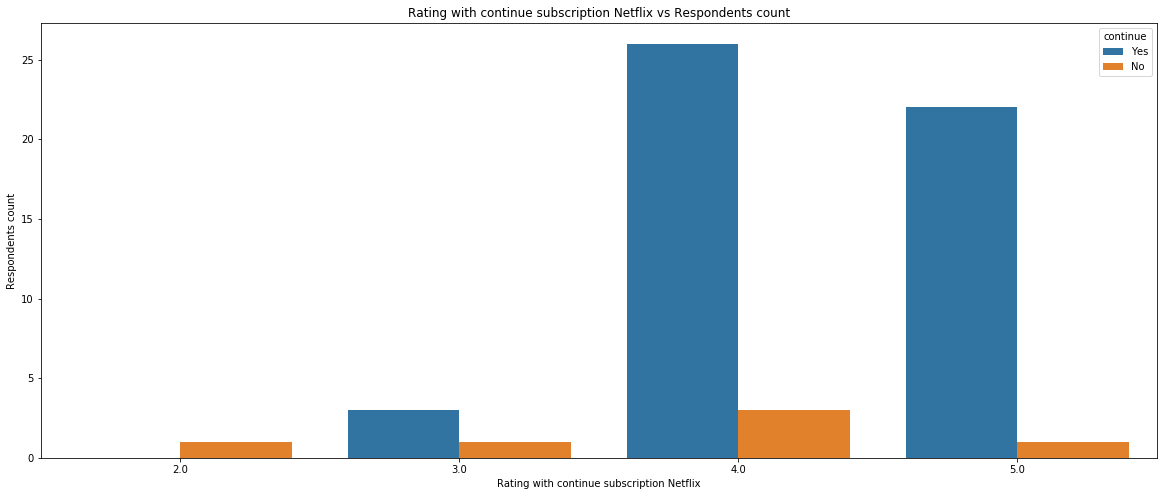

In [26]:
# 19 : Will you continue subscription Netflix?
# 20 : How would you rate the experience on Netflix?
plt.figure(figsize=(20,8))
ax = sns.countplot(x='rating', data=df_csv, hue='continue')
ax.set_ylabel('Respondents count')
ax.set_xlabel('Rating with continue subscription Netflix')
ax.set_title('Rating with continue subscription Netflix vs Respondents count')